# Q2 Reproducible Code
## What is the effect of rainfall, windspeed, and visibility on the overall severity of the accident?

---

### Import Libraries and Upload Data

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df = pd.read_csv('Data/US_Accidents_King_County.csv', low_memory = False)

In [2]:
df.head()

,ID,Severity,Start_Time,End_Time,Start_Lat,Start_Lng,End_Lat,End_Lng,Distance(mi),Description,...,Traffic_Calming,Traffic_Signal,Turning_Loop,Sunrise_Sunset,Civil_Twilight,Nautical_Twilight,Astronomical_Twilight,year,weekday,hours
0,A-103864,3,2016-11-30 16:48:47,2016-11-30 22:48:47,47.599430,-122.18033,47.60531,-122.185770,0.479,At 8th St/Exit 12 - Accident.,...,False,False,False,Night,Day,Day,Day,2016,2,16
1,A-103879,3,2016-11-30 17:10:47,2016-11-30 23:10:47,47.573921,-122.33951,47.56736,-122.339460,0.453,At Marginal Way - Accident.,...,False,False,False,Night,Night,Day,Day,2016,2,17
2,A-103880,2,2016-11-30 17:17:06,2016-11-30 23:17:06,47.671480,-122.18697,47.66475,-122.187170,0.465,At 72nd Pl/Exit 17 - Accident.,...,False,False,False,Night,Night,Day,Day,2016,2,17
3,A-103924,2,2016-11-30 18:14:21,2016-12-01 00:14:21,47.381510,-122.24471,47.37450,-122.244270,0.485,At WA-516 - Accident.,...,False,False,False,Night,Night,Night,Night,2016,2,18
4,A-103943,2,2016-11-30 18:53:04,2016-12-01 00:53:04,47.637790,-122.19354,47.64174,-122.199308,0.383,At 108th Ave - Accident.,...,False,False,False,Night,Night,Night,Night,2016,2,18


### Check Data Information

In [3]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'year', 'weekday', 'hours'],
      dtype='object')

In [4]:
df.shape

(15903, 50)

### Check null values in the columns of interest for this analysis

In [5]:
df[['Wind_Speed(mph)', 'Precipitation(in)', 'Severity']].isna().sum()

Wind_Speed(mph)      1225
Precipitation(in)    5157
Severity                0
dtype: int64

### Missing value treatment(remove rows with null values)

In [6]:
df_2 = df[['Wind_Speed(mph)', 'Precipitation(in)', 'Severity', 'Start_Lat', 'Start_Lng']]
df_2 = df_2.loc[df_2['Precipitation(in)'].notnull(), :]
df_2 = df_2.loc[df_2['Wind_Speed(mph)'].notnull(), :]

In [8]:
df_2[['Wind_Speed(mph)', 'Precipitation(in)', 'Severity']].isna().sum()

Wind_Speed(mph)      0
Precipitation(in)    0
Severity             0
dtype: int64

### Check Severity Distribution

In [25]:
df_2['Severity'].value_counts()

2    8456
3    1014
4     643
1     291
Name: Severity, dtype: int64

### EDA - Box Plot showing Severity vs Wind Speed

<AxesSubplot:xlabel='Severity', ylabel='Wind_Speed(mph)'>

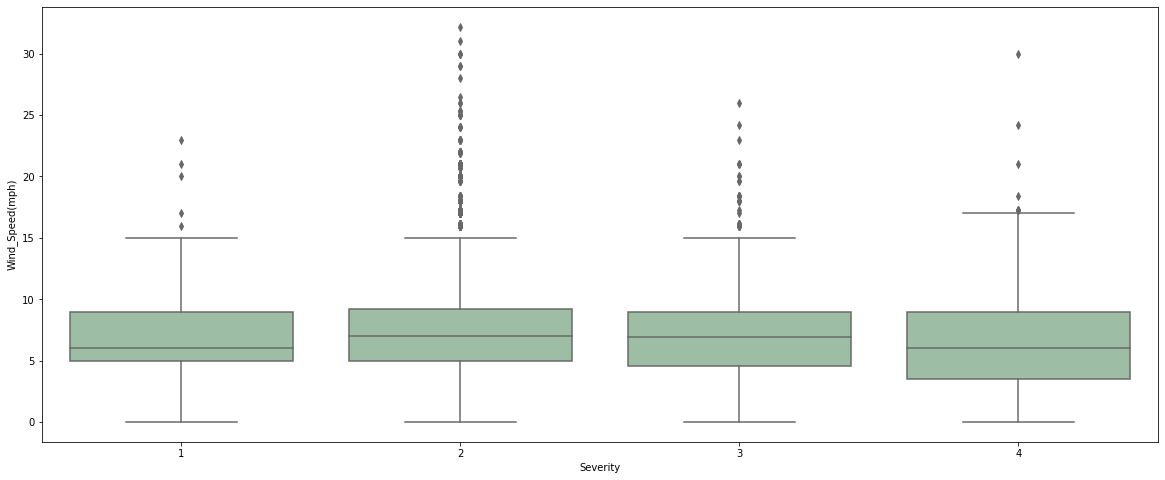

In [27]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Severity', y='Wind_Speed(mph)', data= df_2, color='#99c2a2')

### EDA - Violin Plot showing Severity vs Wind Speed

<AxesSubplot:xlabel='Severity', ylabel='Wind_Speed(mph)'>

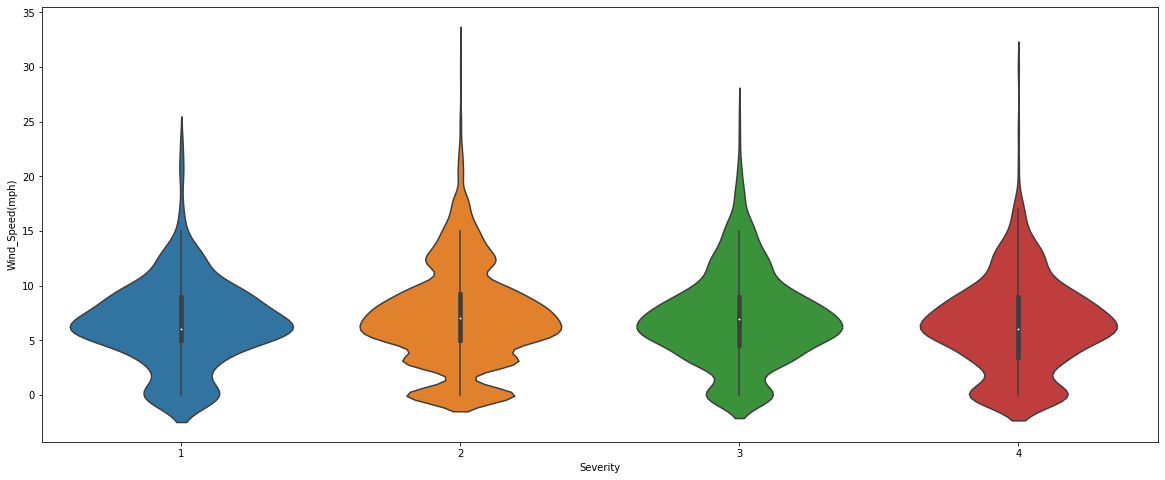

In [28]:
plt.figure(figsize=(20, 8))
sns.violinplot(x=df_2["Severity"], y=df_2["Wind_Speed(mph)"])

### Checking further statistics of Wind Speed vs Severity Distribution

In [29]:
df_2.groupby('Severity')['Wind_Speed(mph)'].agg(['std', 'mean'])

,std,mean
Severity,,
1,3.864318,6.525773
2,4.570933,7.201868
3,4.238366,7.042505
4,4.248585,6.420373


### EDA - Box Plot showing Severity vs Precipitation

<AxesSubplot:xlabel='Severity', ylabel='Precipitation(in)'>

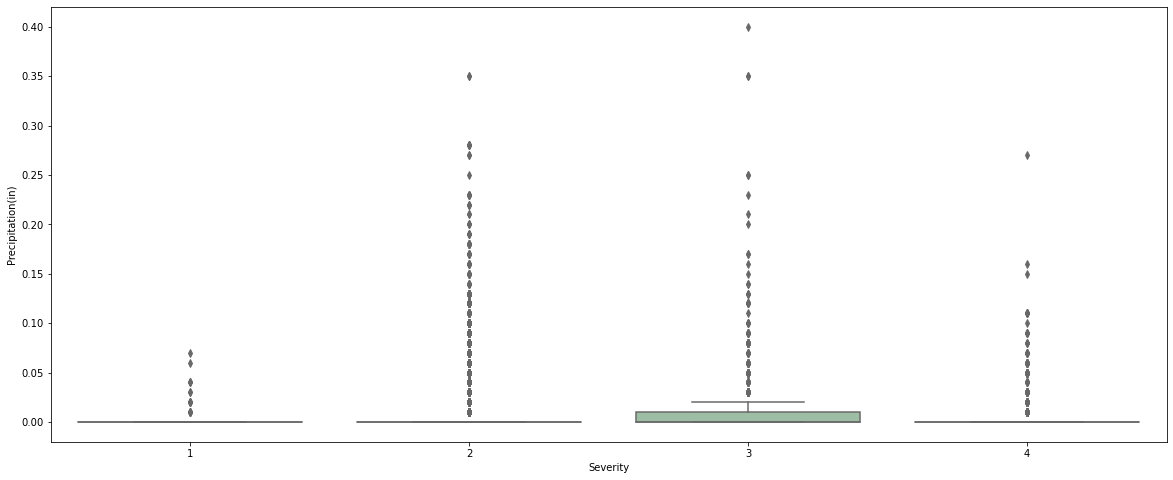

In [30]:
plt.figure(figsize=(20, 8))
sns.boxplot(x='Severity', y='Precipitation(in)', data= df_2, color='#99c2a2')

### Chi Square TEST - done as a part of validation

In [31]:
from scipy.stats import chi2_contingency
  
# defining the table
data = [df_2['Severity'].tolist(), df_2['Precipitation(in)'].tolist()]
stat, p, dof, expected = chi2_contingency(data)
  
# interpret p-value
alpha = 0.05
print("p value is " + str(p))
if p <= alpha:
    print('Dependent (reject H0)')
else:
    print('Independent (H0 holds true)')

p value is 1.0
Independent (H0 holds true)


### One way ANOVA TEST: precpitation - the main test used for this analysis

In [32]:
import scipy.stats as stats
from scipy.stats import f_oneway
x1 = df_2.loc[df_2['Severity'] == 1, 'Precipitation(in)']
x2 = df_2.loc[df_2['Severity'] == 2, 'Precipitation(in)']
x3 = df_2.loc[df_2['Severity'] == 3, 'Precipitation(in)']
x4 = df_2.loc[df_2['Severity'] == 4, 'Precipitation(in)']

fvalue, pvalue = stats.f_oneway(x1, x2, x3, x4)
print(fvalue, pvalue)

12.563869190242656 3.39287927414556e-08


### One way ANOVA TEST: wind speed - the main test used for this analysis

In [33]:
import scipy.stats as stats
from scipy.stats import f_oneway
x1 = df_2.loc[df_2['Severity'] == 1, 'Wind_Speed(mph)']
x2 = df_2.loc[df_2['Severity'] == 2, 'Wind_Speed(mph)']
x3 = df_2.loc[df_2['Severity'] == 3, 'Wind_Speed(mph)']
x4 = df_2.loc[df_2['Severity'] == 4, 'Wind_Speed(mph)']

fvalue, pvalue = stats.f_oneway(x1, x2, x3, x4)
print(fvalue, pvalue)

7.898889296448991 2.9261191568696138e-05


### Exploratory Data Analhysis using Live Maps

In [34]:
#!pip install plotly

In [35]:
import plotly.express as px

In [36]:
df.columns

Index(['ID', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng',
       'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Number', 'Street',
       'Side', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone',
       'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)',
       'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction',
       'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity',
       'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway',
       'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal',
       'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight',
       'Astronomical_Twilight', 'year', 'weekday', 'hours'],
      dtype='object')

### Precipitation in King County

In [46]:
fig = px.density_mapbox(df_2, lat='Start_Lat', lon='Start_Lng', z='Precipitation(in)',
                        mapbox_style="stamen-terrain", opacity = 0.7)
fig

### Severity Heat Map in King County

In [47]:
fig = px.density_mapbox(df_2, lat='Start_Lat', lon='Start_Lng', z='Severity',
                        mapbox_style="stamen-terrain", opacity = 0.7)
fig

---

# END